In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
import plotter

## Importing data points
Generated by data_gen_determ_speed and data_gen_stoch_speed

In [81]:
f = open('data/cutoff_speed_pars.tsv', 'r')

cutoffs = []
for line in f.readlines():
    if line[0] == '#':
        continue
        
    par = line.split('\t')[0]
    val = float(line.split('\t')[1])
    if par == 'cutoff':
        cutoffs.append(val)
    if par == 'D':
        D = val
        
f.close()


f = open('data/cutoff_speed.tsv', 'r')

r0_list_cutoff = []
speeds_cutoff, speeds_FKPP_cutoff, speeds_lin_cutoff = [], [], []
f_tips_cutoff, s_tips_cutoff = [], []
run = 0
speeds_aux, speeds_FKPP_aux, speeds_lin_aux = [], [], []
f_tips_aux, s_tips_aux = [], []

for line in f.readlines():
    if line[0] == '#':
        continue
        
    current_run = int(line.split('\t')[0])
    if current_run > run:
        run = current_run
        speeds_cutoff.append(speeds_aux)
        speeds_FKPP_cutoff.append(speeds_FKPP_aux)
        speeds_lin_cutoff.append(speeds_lin_aux)
        f_tips_cutoff.append(f_tips_aux)
        s_tips_cutoff.append(s_tips_aux)
        speeds_aux, r0_list_cutoff, speeds_FKPP_aux, speeds_lin_aux = [], [], [], []
        f_tips_aux, s_tips_aux = [], []
        
    speeds_aux.append(float(line.split('\t')[2]))
    f_tips_aux.append(float(line.split('\t')[3]))
    s_tips_aux.append(float(line.split('\t')[4]))
    speeds_FKPP_aux.append(float(line.split('\t')[5]))
    speeds_lin_aux.append(float(line.split('\t')[6]))
    r0_list_cutoff.append(float(line.split('\t')[1]))
    
r0_list_cutoff = np.array(r0_list_cutoff)
speeds_cutoff = np.row_stack((speeds_cutoff, speeds_aux))
f_tips_cutoff = np.row_stack((f_tips_cutoff, f_tips_aux))
s_tips_cutoff = np.row_stack((s_tips_cutoff, s_tips_aux))
speeds_FKPP_cutoff = np.row_stack((speeds_FKPP_cutoff, speeds_FKPP_aux))
speeds_lin_cutoff = np.row_stack((speeds_lin_cutoff, speeds_lin_aux))

f.close()


f = open('data/stoch_speed.tsv', 'r')

r0_list_poiss, f_tips_poiss, s_tips_poiss = [], [], []
speeds_poiss = []
for line in f.readlines():
    if line[0] == '#':
        continue
        
    r0_list_poiss = np.append(r0_list_poiss, float(line.split('\t')[0]))
    speeds_poiss = np.append(speeds_poiss, float(line.split('\t')[1]))
    f_tips_poiss = np.append(f_tips_poiss, float(line.split('\t')[2]))
    s_tips_poiss = np.append(s_tips_poiss, float(line.split('\t')[3]))
    
f.close()

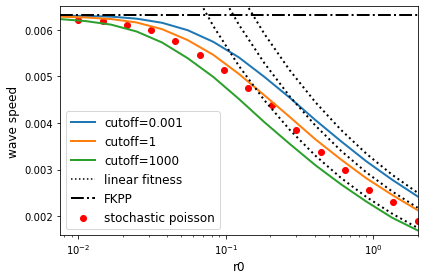

In [82]:
plt.xscale('log')
plt.xlabel('r0', fontsize=12)
plt.ylabel('wave speed', fontsize=12)

plt.xlim(r0_list_cutoff[0], r0_list_cutoff[-1])
plt.ylim(0.0016,0.0065)

for i,c in enumerate(cutoffs):
    plt.plot(r0_list_cutoff, speeds_cutoff[i], label='cutoff=%g'%c, lw=2)
    plt.plot(r0_list_cutoff, speeds_lin_cutoff[i], c='k', ls=':', lw=2)
    
plt.plot([0,0],[0,0], c='k', ls=':', label='linear fitness')
plt.plot(r0_list_cutoff, speeds_FKPP_cutoff[0], c='k', ls='-.', label='FKPP', lw=2)

plt.scatter(r0_list_poiss, speeds_poiss, label='stochastic poisson', c='red')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('plots/speed_cutoffs.svg', dpi=200)

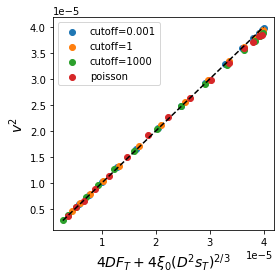

In [83]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,4))
ax1.set_ylabel(r'$v^2$', fontsize=14)
ax1.set_xlabel(r'$4 D F_T + 4 \xi_0 (D^2 s_T)^{2/3}$', fontsize=14)

speed_estim = 4 * D * f_tips_cutoff - 4*2.3381*(D**2 * s_tips_cutoff)**(2/3)
for i,c in enumerate(cutoffs):
    ax1.scatter(speed_estim[i], speeds_cutoff[i]**2, label='cutoff=%g'%c)
    
speed_estim_poiss = 4 * D * f_tips_poiss - 4*2.3381*(D**2 * s_tips_poiss)**(2/3)
ax1.scatter(speed_estim_poiss, speeds_poiss**2, label='poisson')


x = np.linspace(np.min(speed_estim2), np.max(speed_estim2))
ax1.plot(x, x, c='k', ls='--')
ax1.legend()

plt.tight_layout()
plt.savefig('plots/speed_fitness_relation_cutoffs.svg', dpi=200)

## Delta x invariance

In [72]:
f = open('data/dx_speed_pars.tsv', 'r')

delta_xs, Ds = [], []
for line in f.readlines():
    if line[0] == '#':
        continue
        
    par = line.split('\t')[0]
    val = float(line.split('\t')[1])
    if par == 'Dx':
        delta_xs.append(val)
    if par == 'D':
        Ds.append(val)
        
f.close()


f = open('data/dx_speed.tsv', 'r')

r0_list_dx, speeds_dx = [], []
run = 0
r0_aux, speeds_aux = [], []

for line in f.readlines():
    if line[0] == '#':
        continue
        
    current_run = int(line.split('\t')[0])
    if current_run > run:
        run = current_run
        speeds_dx.append(speeds_aux)
        r0_list_dx.append(r0_aux)
        speeds_aux, r0_aux = [], []
        
    speeds_aux.append(float(line.split('\t')[2]))
    r0_aux.append(float(line.split('\t')[1]))
    
r0_list_dx = np.row_stack((r0_list_dx, r0_aux))
speeds_dx = np.row_stack((speeds_dx, speeds_aux))

f.close()

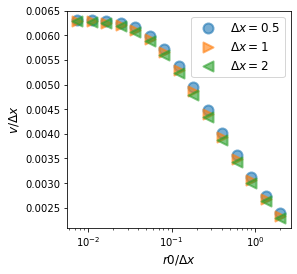

In [80]:
plt.figure(figsize=(4,4))
plt.xscale('log')
plt.xlabel(r'$r0/\Delta x$', fontsize=12)
plt.ylabel(r'$v/\Delta x$', fontsize=12)

markers = ['o', '>', '<']
for i in range(len(delta_xs)):
    plt.scatter(r0_list_dx[i]/delta_xs[i], speeds_dx[i]/delta_xs[i], marker=markers[i], s=100, label=r'$\Delta x = %g$'%delta_xs[i], lw=2, alpha=0.6)

plt.legend(fontsize=12)
plt.savefig('plots/speed_delta_x.svg', dpi=200)